 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Jake Jackson<br>
**ID Number**: 2046805


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2046805 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

print('x', X)
print('y', Y)

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200
x [[1.61499023e+02 2.62947190e-01 1.31369889e+03]
 [1.17453835e+02 3.79107990e-01 2.09908081e+03]
 [8.07495117e+01 2.52113219e-01 1.18102159e+03]
 [1.43554688e+02 5.16368016e-01 2.37581260e+03]
 [7.83025568e+01 1.86563

We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

def print_data(X,Y):
    for a in range(0,len(X)):
        print('a =',a,  X[a], Y[a])


# m_test needs to be the number of samples in the test set
m_test = round(len(X)*0.25)

#m_training

m_training = len(X)-m_test

#I'm taking the first 0.75% for training purposes
#array in python rows columns
# X_training = instances for training set

X_training = X[:m_training,...]
Y_training = Y[:m_training]

print_data(X,Y)
    
print('now set')

print_data(X_training,Y_training)


    
X_test = X[m_training:,...] 
Y_test = Y[m_training:] 
print_data(X_test,Y_test)


def check_dataset(Y):
    c_count=0
    m_count=0
    for i in Y:
        if i==-1: #classical
            c_count=c_count+1
        if i==1: #metal
            m_count=m_count+1    
    print('c = ', c_count, 'm = ', m_count, )

def print_data(X,Y):
    for a in range(0,len(X)):
        print('a =',a,  X[a], Y[a])

check_dataset(Y_training) 




a = 0 [1.61499023e+02 2.62947190e-01 1.31369889e+03] -1
a = 1 [1.17453835e+02 3.79107990e-01 2.09908081e+03] 1
a = 2 [8.07495117e+01 2.52113219e-01 1.18102159e+03] -1
a = 3 [1.43554688e+02 5.16368016e-01 2.37581260e+03] 1
a = 4 [7.83025568e+01 1.86563747e-01 1.07944898e+03] -1
a = 5 [1.51999081e+02 2.81669837e-01 1.32202642e+03] -1
a = 6 [1.07666016e+02 2.76292326e-01 1.21119995e+03] -1
a = 7 [1.51999081e+02 4.40919990e-01 2.74111811e+03] 1
a = 8 [1.51999081e+02 3.19262862e-01 1.01627941e+03] -1
a = 9 [1.07666016e+02 5.80973799e-01 2.65626119e+03] 1
a = 10 [1.23046875e+02 2.74433506e-01 8.76875613e+02] -1
a = 11 [1.17453835e+02 4.36434119e-01 2.50247278e+03] 1
a = 12 [9.22851562e+01 2.23738306e-01 2.19279809e+03] -1
a = 13 [1.23046875e+02 4.72493846e-01 2.71001460e+03] 1
a = 14 [9.57031250e+01 5.16697528e-01 3.33873318e+03] 1
a = 15 [1.51999081e+02 2.43056368e-01 9.49460832e+02] -1
a = 16 [1.43554688e+02 2.17626991e-01 7.89601607e+02] -1
a = 17 [9.57031250e+01 2.15812677e-01 2.17234094

a = 37 [9.57031250e+01 3.33862600e-01 1.52490676e+03] -1
a = 38 [1.61499023e+02 4.06924980e-01 2.70749944e+03] 1
a = 39 [7.17773438e+01 2.34236042e-01 1.52664707e+03] -1
a = 40 [1.17453835e+02 2.78348916e-01 1.24371802e+03] -1
a = 41 [1.61499023e+02 5.33731873e-01 2.71689121e+03] 1
a = 42 [1.23046875e+02 4.45083082e-01 2.33989753e+03] 1
a = 43 [1.35999178e+02 2.46935361e-01 1.55881395e+03] -1
a = 44 [1.72265625e+02 2.96546770e-01 1.51556209e+03] -1
a = 45 [9.93840144e+01 2.77865226e-01 1.49003481e+03] -1
a = 46 [1.61499023e+02 2.37426219e-01 1.35990531e+03] -1
a = 47 [1.61499023e+02 2.84173046e-01 1.53406498e+03] -1
a = 48 [1.61499023e+02 2.39078871e-01 1.15788986e+03] -1
a = 49 [1.72265625e+02 4.85037105e-01 2.98670516e+03] 1
a = 50 [1.12347147e+02 4.48278766e-01 2.06866353e+03] 1
a = 51 [1.17453835e+02 4.56040406e-01 2.26914139e+03] 1
a = 52 [1.29199219e+02 4.87653545e-01 2.71855794e+03] 1
a = 53 [1.07666016e+02 3.09652754e-01 1.52561929e+03] -1
a = 54 [8.91029095e+01 2.56394968e-01 

We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.61499023e+02 2.62947190e-01 1.31369889e+03]
 [1.00000000e+00 1.17453835e+02 3.79107990e-01 2.09908081e+03]
 [1.00000000e+00 8.07495117e+01 2.52113219e-01 1.18102159e+03]
 [1.00000000e+00 1.43554688e+02 5.16368016e-01 2.37581260e+03]
 [1.00000000e+00 7.83025568e+01 1.86563747e-01 1.07944898e+03]
 [1.00000000e+00 1.51999081e+02 2.81669837e-01 1.32202642e+03]
 [1.00000000e+00 1.07666016e+02 2.76292326e-01 1.21119995e+03]
 [1.00000000e+00 1.51999081e+02 4.40919990e-01 2.74111811e+03]
 [1.00000000e+00 1.51999081e+02 3.19262862e-01 1.01627941e+03]
 [1.00000000e+00 1.07666016e+02 5.80973799e-01 2.65626119e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
class Perceptron:

    def __init__(self, learning_rate=0.01, N=1000):#initialise the class
        self.lr = learning_rate
        self.N = N
        self.sign = self.sign_f
        curr_w = None
        self.bias = None
        self.correct = 0
        self.wrong =0
        
        
    def fit(self, X, y):#perform the fit on the data
        n_samples, n_features = X.shape

        # init parameters
        self.bias = 0
        curr_w = np.zeros(n_features - 1)#The array already has the 1 term added so we dont want to double allow it when we add the bias in
        self.curr_w = np.insert(curr_w, 0, self.bias, axis=0)#This puts the bias in the array
        
        
        for _ in range(self.N): #the number of defined iterations do it this way to make sure we evenly go through data
            permutation = np.random.permutation(len(X)) # randomise
            X=X[permutation]
            y=y[permutation]
            for idx, x_i in enumerate(X): #the fit that then updates next iteration

                linear_output = np.dot(x_i, self.curr_w)# bias just links to the 1 in the dot product
                y_predicted = self.sign(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.curr_w[1:] += update * x_i[1:]
                self.curr_w[0] += update

    def results(self, X, y): #need to incorperate!
        linear_output = np.dot(X, self.curr_w)
        for a in range(0,len(X)):#could write as a list comp 
            y_predicted = self.sign(linear_output[a])
            if y_predicted == y[a]:
                self.correct+=1
            elif y_predicted != y[a]:
                self.wrong+=1
                
    def predict(self, X):
        linear_output = np.dot(X, self.curr_w)
        y_predicted = self.sign(linear_output)
        return y_predicted

    def sign_f(self, x):
        return np.where(x >= 0, 1, -1)#Used where as it can work on 1 or many samples 
    
# Testing
if __name__ == "__main__":
 
    p = Perceptron(learning_rate=0.2, N=100)
    p.fit(X_training, Y_training)
    p.results(X_training, Y_training)
    # this works out what the test data should be
    
    best_error=p.wrong/p.correct
    best_w= p.curr_w
    
    #best as we are using the data from the end when fully calibarted   
    print('p_wrong =', p.wrong, 'p_correct =', p.correct )
    print('best_error = ', best_error, ', best_w =', best_w)
 

p_wrong = 16 p_correct = 134
best_error =  0.11940298507462686 , best_w = [  -340.         -21313.28630477     29.5989338    1413.24752193]


Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
#w_found, error = perceptron(X_training,Y_training, 100)

w_found, error = best_w, best_error

print("Training Error of perpceptron (100 iterations): " + str(error))

Training Error of perpceptron (100 iterations): 0.11940298507462686


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset
predictions = p.predict(X_test)

num_errors=0# count when wrong prediction (incorperate into class!)

for a in range(0,len(Y_test)):
    if Y_test[a] != predictions[a]:
        num_errors+=1

print('wrong = ', num_errors, ', test size = ', m_test  )

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

wrong =  7 , test size =  50
Test Error of perpceptron (100 iterations): 0.14


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

Test error was lower than the training error, we have a very small sample size and this is due to a slight instability in the data. 

I know that usually the training data has a lower error on account of that been the model that generated the fit.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 3000 iterations here!

# PLACE YOUR CODE
p4000 = Perceptron(learning_rate=0.2, N=4000)
p4000.fit(X_training, Y_training)
p4000.results(X_training, Y_training)
error=p4000.wrong/p4000.correct

print("Training Error of perpceptron (4000 iterations): " + str(error))
pred_4000 = p4000.predict(X_test)

num_errors=0
for a in range(0,len(Y_test)):
    if Y_test[a] != pred_4000[a]:
        num_errors+=1

print('wrong = ', num_errors, ', test size = ', m_test  )
true_loss_estimate = num_errors/m_test

# PLACE YOUR CODE
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (4000 iterations): 0.2
wrong =  8 , test size =  50
Test Error of perpceptron (4000 iterations): 0.16


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

Both errors reduced as we updated an keeped improving the fit through more and more iterations. I think that running only 100 iterations was not enough to to give the best data. In fact this is highlighted by the fact running 4000 iterations now gives a training error smaller that the test error as expected.  

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = round(len(X)*0.75)
m_test = len(X) - m_training

X_training = X[:m_training,...]
Y_training = Y[:m_training]

X_test = X[m_training:,...] 
Y_test = Y[m_training:] 


print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 26
Number of metal instances in test: 24

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:
# t true, p predicted
def num_wrong(y_p, y_t): #need to incorperate!
    wrong=0
    for a in range(0,len(y_p)):#could write as a list comp 
        if y_p[a] != y_t[a]:
            wrong+=1
    return wrong
#print(num_wrong(Y_training,predictions))

#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set
logreg.fit(X_training,Y_training)
#predict on training set
pred_train = logreg.predict(X_training)
#print the error rate = fraction of misclassified samples
error_rate_training = 0
train_wrong=num_wrong(pred_train, Y_training)

error_rate_training=train_wrong/(len(Y_training)-train_wrong)
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
pred_test=logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 0
test_wrong = num_wrong(pred_test,Y_test)
print(test_wrong)
error_rate_test=test_wrong/(len(Y_test)-test_wrong)

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.006711409395973154
0
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 1
index_feature2 = 2

features = [index_feature1, index_feature2]
#temp chroma
feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[:m_training,...]
Y_training = Y[:m_training]

X_test = X_reduced[m_training:,...] 
Y_test = Y[m_training:] 


Now learn a model using the training data and measure the performances.

In [14]:
# learning from training data

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
logreg.fit(X_training,Y_training)

pred_train=logreg.predict(X_training)

train_wrong=num_wrong(pred_train, Y_training)
error_rate_training=train_wrong/(len(Y_training)-train_wrong)
#print the error rate = fraction of misclassified samples
print('Training Wrong', train_wrong, error_rate_training)

logreg.fit(X_test,Y_test)

error_rate_test = 0
pred_test=logreg.predict(X_test)
test_wrong=num_wrong(pred_test, Y_test)
error_rate_test=test_wrong/(len(Y_training)-test_wrong)


print("Error rate on test set: " + str(error_rate_test))

Training Wrong 2 0.013513513513513514
Error rate on test set: 0.0


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

I selected chroma_stft and spectral_centroid. This is because I found that they had the lowest errors out of the choices avalible. This combination had a lower error than all three features together. This is likely because we isolated something meaningful in the original data    

**ANSWER QUESTION 3**

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<ipython-input-15-2ef61150b86e>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


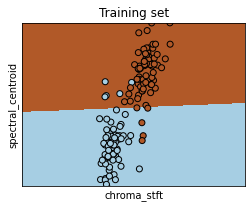

<ipython-input-15-2ef61150b86e>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


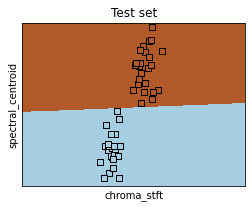

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [16]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [17]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [18]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(Data)

#training data 
X_training = Data[:m_t,:13]#exclude the final col with prices
Y_training = Data[:m_t,-1]

print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[m_t:,:13] 
Y_test = Data[m_t:,-1] 
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [19]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [-0. -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [-0.10331692  0.04351568 -0.02607861  0.09810034 -0.07137112  0.09300186
 -0.02965309  0.08188737  0.0127175  -0.01031372  0.01854787  0.07978574
 -0.0345326 ]
Std of the test input data: [0.74736364 1.01312137 0.90119785 1.15920563 1.00523882 0.91149766
 1.05453167 1.01623432 0.9788831  0.96767549 0.9181349  0.87615064
 0.93798162]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [20]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training ,rcond=None)#stop warning
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 

RSStr_hand = sum((Y_training-np.dot(X_trainingH,w_np))**2)

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [224.7         -9.24987201  13.13956888   2.1078562    3.5474689
 -25.897648    21.67201459   7.53635414 -32.50032617  27.04293886
 -22.33156829 -22.5084666    7.42611219 -42.88498108]
RSS with numpy lstsq:  [791031.38958083]
Empirical risk with numpy lstsq: [2260.08968452]


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [21]:
#compute predictions on training and test

prediction_training = np.dot(X_trainingH, w_np)
prediction_test = np.dot(X_testH, w_np)

#what about the loss for points in the test data?
RSS_test = sum((Y_test - np.dot(X_testH, w_np))**2)


print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: 320953.4903203895
Loss estimated from test data: 2139.689935469263


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The test error is bigger than the training as expected 

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [22]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()
LinReg.fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

pred_train = LinReg.predict(X_training)
pred_test = LinReg.predict(X_test)

print('Training Predictions')
#print(pred_train)
print(pred_test)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 224.70000000000087
Least-Squares Coefficients: [ -9.24987201  13.13956888   2.1078562    3.5474689  -25.897648
  21.67201459   7.53635414 -32.50032617  27.04293886 -22.33156829
 -22.5084666    7.42611219 -42.88498108]
Training Predictions
[158.25540472 216.28405501 214.19378158 138.80912414 210.20275533
 221.96177084 241.70354533 242.97453564 281.38861819 376.15594941
 303.47266768 289.81217939 281.18462696  96.45252224 352.07763714
 365.13969078 194.25110352 213.34694633 201.95604477 315.60578635
  87.69801115 247.20132304 230.63906642 309.21981098 282.64845632
 187.36255673 246.35620784  98.74194766 220.52604655 247.86626599
 330.17356887 318.80048761 221.75278392 158.91563411 261.30075161
 239.71622174 237.34735304 173.52796862 210.80629876  83.2721643
 172.92787325 308.57037745 178.0593051  133.69752567 167.15315123
 304.63477466 295.84883458  93.92976088 244.56876897 323.95150978
 404.06154248 188.54430401 315.18900468 144.85783222 163.22016188
 426.19430261 240.6455550